<a href="https://colab.research.google.com/github/Wichoskli/Modelos-de-regresi-n-lineal-/blob/main/Modelos_de_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #Importar los modelos de regresión

In [ ]:
#Importar csv
from google.colab import files
files.upload()

In [ ]:
#Leer archivo
df= pd.read_csv("cuentas_credicel.csv", encoding= 'latin')

<ipython-input-3-b8ecaf1f9ca2>:2: DtypeWarning: Columns (26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("cuentas_credicel.csv", encoding= 'latin')


In [ ]:
#Realizamos una copia del dataframe
data=df.copy()

**Quitar las "S" de la columna: plazo**

In [ ]:
data['plazo']=data['plazo'].str.replace('S','')

In [ ]:
data['plazo']=data['plazo'].astype(int)

**Convertir columna riesgo a entero, quitando los carácteres existentes**

In [ ]:
#Analizar categorias de una columna
riesgo_categorias = data.groupby(['riesgo'])['riesgo'].count()
riesgo_categorias

riesgo
-64.0     4
-60.0     3
-58.0     4
-57.0     2
-55.0     1
         ..
 79.0     1
 84.0     2
 87.0     1
 91.0     1
 103.0    1
Name: riesgo, Length: 1524, dtype: int64

In [ ]:
#Sustituyo los strings Atraso, Cancelado y Fraude por la constante "0"
data['riesgo']=data['riesgo'].str.replace('Atraso', '0')
data['riesgo']=data['riesgo'].str.replace('Cancelado', '0')
data['riesgo']=data['riesgo'].str.replace('Fraude', '0')

AttributeError: ignored

In [ ]:
#Sustituyo valores nulos por el numero "0"
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
data["riesgo"]= data["riesgo"].fillna(0)

In [ ]:
#Conversión de tipo de dato de columna de tipo Object a int
data['riesgo']= data['riesgo'].astype(float)

In [ ]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  int64  
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

**DIVISIÓN DE VARIABLES**

In [ ]:
#Obtener variables cuantitativas
Cuantitativas = data.select_dtypes(include=['int', 'float'])
Cuantitativas

,folio,folio_solicitud,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,3,30,26,1949.0,780.0,0.0,81,1169.0,2106,0.0,...,0,0,0,NaN,NaN,NaN,0.00,0.0,26.0,NaN
1,4,33,13,2999.0,1050.0,0.0,225,1949.0,2925,0.0,...,0,0,0,NaN,NaN,NaN,0.00,0.0,13.0,NaN
2,5,37,13,1959.0,490.0,0.0,170,1469.0,2210,0.0,...,0,0,0,NaN,0.0,0.00,0.00,0.0,NaN,NaN
3,6,38,13,1959.0,490.0,0.0,170,1469.0,2210,0.0,...,0,0,0,NaN,NaN,NaN,0.00,0.0,13.0,NaN
4,7,44,39,4299.0,1075.0,0.0,178,3224.0,6942,0.0,...,0,0,0,0.0,0.0,0.00,0.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,26,3349.0,297.0,0.0,211,3052.0,5486,0.0,...,0,0,0,NaN,NaN,27.40,-1.13,0.0,NaN,NaN
22731,22968,96479,26,4100.0,1209.0,0.0,200,2891.0,5200,0.0,...,0,0,0,NaN,NaN,19.00,7.48,0.0,NaN,NaN
22732,22969,96442,26,4849.0,1152.0,0.0,256,3697.0,6656,0.0,...,0,0,0,NaN,NaN,26.65,0.75,0.0,NaN,NaN
22733,22970,96536,39,9799.0,2799.0,0.0,386,7000.0,15054,0.0,...,0,0,0,NaN,NaN,-17.35,-0.14,0.0,NaN,NaN


In [ ]:
#Obtener variables cualitativas
Cualitativas = data.select_dtypes(include=['object'])
Cualitativas

,tag,fecha,marca,modelo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,razones_buro,semana_actual,codigo_postal,Unnamed: 33,Unnamed: 34
0,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,NaN,NaN,0,0.0,0,NaN,NaN
1,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,Alvaro Rafael Pascual,mic015,microtec,NaN,NaN,NaN,0,0.0,0,NaN,NaN
2,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,NaN,NaN,0,0.0,NaN,NaN,74
3,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,Luz Aylin Hernandez Lopez1,mic0748,microtec,NaN,NaN,NaN,0,0.0,0,NaN,NaN
4,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,Mora,NaN,NaN,74,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,Mildred Asuncion Arguello Caamal,svc044,servicel,18/04/2023 18:45,25/04/2023 00:00,NaN,0,"K0,J0,D8,E2",0,97880.0,NaN
22731,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,18/04/2023 18:46,25/04/2023 00:00,NaN,0,"K0,J0,D8,E2",0,37295.0,NaN
22732,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,Nicolás Jiménez Sánchez,gph008,NaN,18/04/2023 18:47,25/04/2023 00:00,NaN,0,"K0,D7,F7,D8",0,20210.0,NaN
22733,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,Maribel Ulibarri Medina,gph014,grupoph,18/04/2023 18:49,25/04/2023 00:00,NaN,0,"J0,G1,E0,E2",0,78434.0,NaN


In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  float64
 4   enganche          22735 non-null  float64
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  int64  
 7   monto_financiado  22735 non-null  float64
 8   costo_total       22735 non-null  int64  
 9   monto_accesorios  22735 non-null  float64
 10  status            22735 non-null  int64  
 11  fraude            22735 non-null  int64  
 12  inversion         22735 non-null  int64  
 13  pagos_realizados  22735 non-null  int64  
 14  reautorizacion    22735 non-null  int64  
 15  puntos            19140 non-null  float64
 16  riesgo            13911 non-null  float6

In [ ]:
#Corroboramos valores nulos de cuantitativas
Cuantitativasnu=Cuantitativas.isnull().sum()
Cuantitativasnu

folio                   0
folio_solicitud         0
plazo                   0
precio                  0
enganche                0
descuento               0
semana                  0
monto_financiado        0
costo_total             0
monto_accesorios        0
status                  0
fraude                  0
inversion               0
pagos_realizados        0
reautorizacion          0
puntos               3595
riesgo               8824
porc_enganche        2473
porc_tasa               0
score_buro              0
Unnamed: 35         20262
Unnamed: 36         22734
dtype: int64

In [ ]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
Cuantitativas["puntos"]=Cuantitativas["puntos"].fillna(round(Cuantitativas["puntos"].mean(),1))

In [ ]:
#Corroboramos valores nulos de cuantitativas
Cuantitativasnu=Cuantitativas.isnull().sum()
Cuantitativasnu

folio                   0
folio_solicitud         0
plazo                   0
precio                  0
enganche                0
descuento               0
semana                  0
monto_financiado        0
costo_total             0
monto_accesorios        0
status                  0
fraude                  0
inversion               0
pagos_realizados        0
reautorizacion          0
puntos                  0
riesgo               8824
porc_enganche        2473
porc_tasa               0
score_buro              0
Unnamed: 35         20262
Unnamed: 36         22734
dtype: int64

In [ ]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
Cuantitativas["porc_enganche"]=Cuantitativas["porc_enganche"].fillna(round(Cuantitativas["porc_enganche"].mean(),1))

In [ ]:
#Corroboramos valores nulos de cuantitativas
Cuantitativasnu=Cuantitativas.isnull().sum()
Cuantitativasnu

folio                   0
folio_solicitud         0
plazo                   0
precio                  0
enganche                0
descuento               0
semana                  0
monto_financiado        0
costo_total             0
monto_accesorios        0
status                  0
fraude                  0
inversion               0
pagos_realizados        0
reautorizacion          0
puntos                  0
riesgo               8824
porc_enganche           0
porc_tasa               0
score_buro              0
Unnamed: 35         20262
Unnamed: 36         22734
dtype: int64

In [ ]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
Cuantitativas["Unnamed: 35"]=Cuantitativas["Unnamed: 35"].fillna(round(Cuantitativas["Unnamed: 35"].mean(),1))

In [ ]:
#Corroboramos valores nulos de cuantitativas
Cuantitativasnu=Cuantitativas.isnull().sum()
Cuantitativasnu

folio                   0
folio_solicitud         0
plazo                   0
precio                  0
enganche                0
descuento               0
semana                  0
monto_financiado        0
costo_total             0
monto_accesorios        0
status                  0
fraude                  0
inversion               0
pagos_realizados        0
reautorizacion          0
puntos                  0
riesgo               8824
porc_enganche           0
porc_tasa               0
score_buro              0
Unnamed: 35             0
Unnamed: 36         22734
dtype: int64

In [ ]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
Cuantitativas["Unnamed: 36"]=Cuantitativas["Unnamed: 36"].fillna(round(Cuantitativas["Unnamed: 36"].mean(),1))

In [ ]:
#Corroboramos valores nulos de cuantitativas
Cuantitativasnu=Cuantitativas.isnull().sum()
Cuantitativasnu

folio                  0
folio_solicitud        0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
status                 0
fraude                 0
inversion              0
pagos_realizados       0
reautorizacion         0
puntos                 0
riesgo              8824
porc_enganche          0
porc_tasa              0
score_buro             0
Unnamed: 35            0
Unnamed: 36            0
dtype: int64

In [ ]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
Cuantitativas["riesgo"]=Cuantitativas["riesgo"].fillna(round(Cuantitativas["riesgo"].mean(),1))

In [ ]:
#Corroboramos valores nulos de cuantitativas
Cuantitativasnu=Cuantitativas.isnull().sum()
Cuantitativasnu

folio               0
folio_solicitud     0
plazo               0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
porc_enganche       0
porc_tasa           0
score_buro          0
Unnamed: 35         0
Unnamed: 36         0
dtype: int64

**Valores atípicos**

<Figure size 1500x800 with 0 Axes>

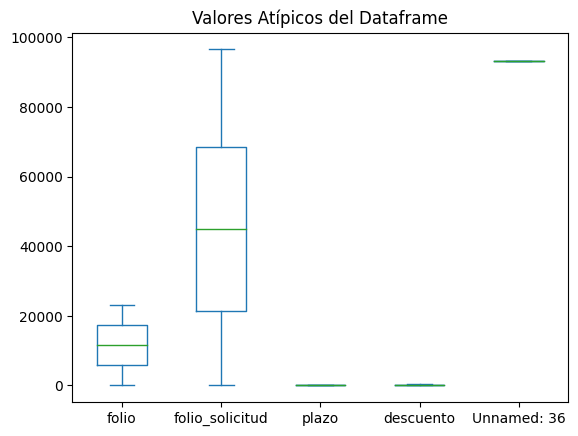

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

In [ ]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

folio                   0
folio_solicitud         0
plazo                   0
precio              22735
enganche            22735
descuento              17
semana              22735
monto_financiado    22735
costo_total         22735
monto_accesorios    22735
status              22735
fraude              22735
inversion           22735
pagos_realizados    22735
reautorizacion      22735
puntos              22735
riesgo              22735
porc_enganche       22735
porc_tasa           22735
score_buro          22735
Unnamed: 35         22735
Unnamed: 36             0
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

,folio,folio_solicitud,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,3,30,26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,4,33,13,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,5,37,13,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,6,38,13,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,7,44,39,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,22968,96479,26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,22969,96442,26,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,22970,96536,39,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

folio                   0
folio_solicitud         0
plazo                   0
precio              22735
enganche            22735
descuento               0
semana              22735
monto_financiado    22735
costo_total         22735
monto_accesorios    22735
status              22735
fraude              22735
inversion           22735
pagos_realizados    22735
reautorizacion      22735
puntos              22735
riesgo              22735
porc_enganche       22735
porc_tasa           22735
score_buro          22735
Unnamed: 35         22735
Unnamed: 36             0
dtype: int64

In [ ]:
Cuantitativas1 = pd.concat([Cualitativas, data_clean], axis=1)
Cuantitativas1

,tag,fecha,marca,modelo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,Alvaro Rafael Pascual,mic015,microtec,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,Luz Aylin Hernandez Lopez1,mic0748,microtec,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,Mora,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,Mildred Asuncion Arguello Caamal,svc044,servicel,18/04/2023 18:45,25/04/2023 00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,18/04/2023 18:46,25/04/2023 00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,Nicolás Jiménez Sánchez,gph008,NaN,18/04/2023 18:47,25/04/2023 00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,Maribel Ulibarri Medina,gph014,grupoph,18/04/2023 18:49,25/04/2023 00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


**PRIMERA FUNCIÓN: folio x plazo**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  object 
 4   enganche          22735 non-null  object 
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  object 
 7   monto_financiado  22735 non-null  object 
 8   costo_total       22735 non-null  object 
 9   monto_accesorios  22735 non-null  object 
 10  status            22735 non-null  object 
 11  fraude            22735 non-null  object 
 12  inversion         22735 non-null  object 
 13  pagos_realizados  22735 non-null  object 
 14  reautorizacion    22735 non-null  object 
 15  puntos            22735 non-null  object 
 16  riesgo            22735 non-null  object

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= data[['folio']]
Var_Dep1= data['plazo']

In [ ]:
#Se define model como la función de regresión lineal
model1= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['folio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-7.61728612e-05]),
 'rank_': 1,
 'singular_': array([995741.90483814]),
 'intercept_': 26.786482498993024}

Modelo matemático: y= -7.61728612e-05x + 26.786482498993024


In [ ]:
#Predecimos los valores de total de folio a partir de la variable "plazo"
y_pred1= model1.predict(X=data[['folio']])
y_pred1

array([26.78625398, 26.78617781, 26.78610163, ..., 25.03686805,
       25.03679188, 25.03671571])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones1', y_pred1)
Cuantitativas1

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.002536446448752505

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.050363145739245725

ValueError: ignored

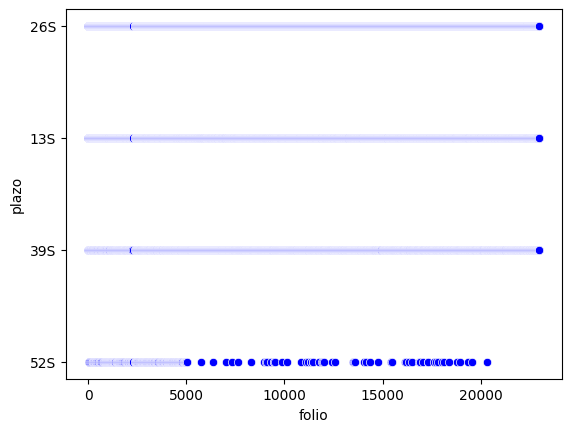

In [ ]:
#Gráfica comparativa

sns.scatterplot(x='folio', y='plazo', color="blue", data=df)
sns.scatterplot(x='folio', y='Predicciones1', color="red", data=df)
#sns.lineplot(x='folio', y='Predicciones1', color="red", data=df)

**SEGUNDA FUNCIÓN: folio solicitud x precio**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  object 
 4   enganche          22735 non-null  object 
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  object 
 7   monto_financiado  22735 non-null  object 
 8   costo_total       22735 non-null  object 
 9   monto_accesorios  22735 non-null  object 
 10  status            22735 non-null  object 
 11  fraude            22735 non-null  object 
 12  inversion         22735 non-null  object 
 13  pagos_realizados  22735 non-null  object 
 14  reautorizacion    22735 non-null  object 
 15  puntos            22735 non-null  object 
 16  riesgo            22735 non-null  object

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= df[['folio_solicitud']]
Var_Dep2= df['precio']

In [ ]:
#Definir modelo de regresión lineal
model2= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['folio_solicitud'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00498549]),
 'rank_': 1,
 'singular_': array([4114922.69265289]),
 'intercept_': 3768.451438174099}

Modelo matemático: y= 0.00498549x + 3768.451438174099

In [ ]:
#Predecimos los valores de total de folio a partir de precio
y_pred2= model2.predict(X=data[['folio_solicitud']])
y_pred2

array([3768.60100285, 3768.61595931, 3768.63590127, ..., 4249.26197918,
       4249.73061516, 4249.72064418])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones2', y_pred2)
Cuantitativas1

,Predicciones2,tag,fecha,marca,modelo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,3768.601003,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,3768.615959,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,Alvaro Rafael Pascual,mic015,microtec,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,3768.635901,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,3768.640887,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,Luz Aylin Hernandez Lopez1,mic0748,microtec,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,3768.670800,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,12/03/2022 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,4249.561109,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,Mildred Asuncion Arguello Caamal,svc044,servicel,18/04/2023 18:45,25/04/2023 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,4249.446442,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,18/04/2023 18:46,25/04/2023 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,4249.261979,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,Nicolás Jiménez Sánchez,gph008,NaN,18/04/2023 18:47,25/04/2023 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,4249.730615,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,Maribel Ulibarri Medina,gph014,grupoph,18/04/2023 18:49,25/04/2023 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.009986727232709325

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.09993361412812671

ValueError: ignored

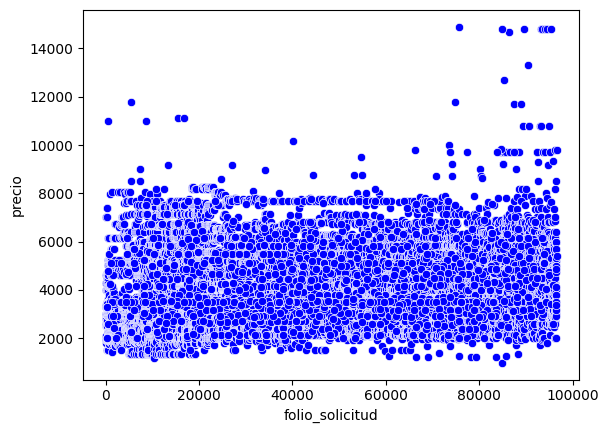

In [ ]:
#Visualizamos la gráfica comparativa

sns.scatterplot(x='folio_solicitud', y='precio', color="blue", data=df)
sns.scatterplot(x='folio_solicitud', y='Predicciones2', color="red", data=df)
#sns.lineplot(x='folio_solicitud', y='Predicciones', color="red", data=df)

**TERCERA FUNCIÓN**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  object 
 4   enganche          22735 non-null  object 
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  object 
 7   monto_financiado  22735 non-null  object 
 8   costo_total       22735 non-null  object 
 9   monto_accesorios  22735 non-null  object 
 10  status            22735 non-null  object 
 11  fraude            22735 non-null  object 
 12  inversion         22735 non-null  object 
 13  pagos_realizados  22735 non-null  object 
 14  reautorizacion    22735 non-null  object 
 15  puntos            22735 non-null  object 
 16  riesgo            22735 non-null  object

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= df[['semana']]
Var_Dep3= df['monto_financiado']

In [ ]:
#Definir modelo de regresión lineal
model3= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['semana'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7.45868987]),
 'rank_': 1,
 'singular_': array([15255.71836322]),
 'intercept_': 1302.852863760899}

Modelo matemático: y= 7.45868987x + 1302.852863760899



In [ ]:
#Predecimos los valores
y_pred3= model3.predict(X=data[['semana']])
y_pred3

array([1907.00674291, 2981.05808363, 2570.83014099, ..., 3212.27746947,
       4181.90715206, 3533.00113371])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones3', y_pred3)
Cuantitativas1

,Predicciones3,Predicciones2,tag,fecha,marca,modelo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,1907.006743,3768.601003,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,2981.058084,3768.615959,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,Alvaro Rafael Pascual,mic015,microtec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,2570.830141,3768.635901,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,Sintia Verenice Tenorio Perez E,mic0437,microtec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,2570.830141,3768.640887,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,Luz Aylin Hernandez Lopez1,mic0748,microtec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,2630.499660,3768.670800,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/2022 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,2876.636426,4249.561109,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,Mildred Asuncion Arguello Caamal,svc044,servicel,18/04/2023 18:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,2794.590837,4249.446442,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,18/04/2023 18:46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,3212.277469,4249.261979,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,Nicolás Jiménez Sánchez,gph008,NaN,18/04/2023 18:47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,4181.907152,4249.730615,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,Maribel Ulibarri Medina,gph014,grupoph,18/04/2023 18:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.4734972333931231

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.6881113524663891

ValueError: ignored

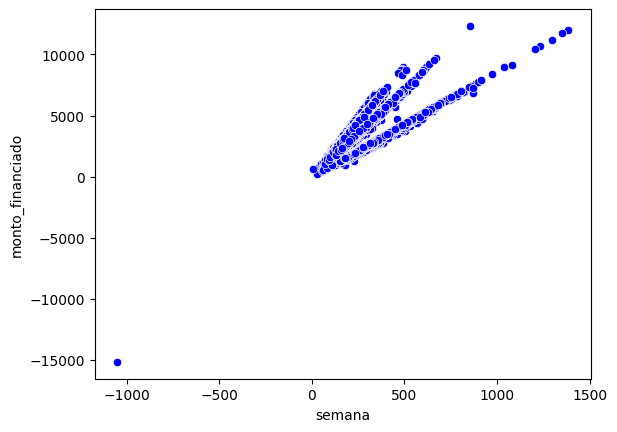

In [ ]:
#Visualizamos la gráfica comparativa

sns.scatterplot(x='semana', y='monto_financiado', color="blue", data=df)
sns.scatterplot(x='semana', y='Predicciones3', color="red", data=df)
#sns.lineplot(x='semana', y='Predicciones', color="red", data=df)

**CUARTA FUNCIÓN**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  object 
 4   enganche          22735 non-null  object 
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  object 
 7   monto_financiado  22735 non-null  object 
 8   costo_total       22735 non-null  object 
 9   monto_accesorios  22735 non-null  object 
 10  status            22735 non-null  object 
 11  fraude            22735 non-null  object 
 12  inversion         22735 non-null  object 
 13  pagos_realizados  22735 non-null  object 
 14  reautorizacion    22735 non-null  object 
 15  puntos            22735 non-null  object 
 16  riesgo            22735 non-null  object

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep4= df[['status']]
Var_Dep4= df['costo_total']

In [ ]:
#Definir modelo de regresión lineal
model4= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['status'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1032.80708708]),
 'rank_': 1,
 'singular_': array([68.14161827]),
 'intercept_': 6996.254764568028}

Modelo matemático: y= -1032.80708708x + 6996.254764568028

In [ ]:
#Predecimos el costo total a partir de 'status'
y_pred4= model4.predict(X=data[['status']])
y_pred4

array([4930.6405904 , 4930.6405904 , 3897.83350332, ..., 5963.44767748,
       5963.44767748, 5963.44767748])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones4', y_pred4)
Cuantitativas1

,Predicciones4,Predicciones3,Predicciones2,tag,fecha,marca,modelo,agente_venta,dis_venta,empresa,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,4930.640590,1907.006743,3768.601003,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,Sintia Verenice Tenorio Perez E,mic0437,microtec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,4930.640590,2981.058084,3768.615959,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,Alvaro Rafael Pascual,mic015,microtec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,3897.833503,2570.830141,3768.635901,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,Sintia Verenice Tenorio Perez E,mic0437,microtec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,4930.640590,2570.830141,3768.640887,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,Luz Aylin Hernandez Lopez1,mic0748,microtec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,5963.447677,2630.499660,3768.670800,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,Sintia Verenice Tenorio Perez E,mic0437,microtec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,5963.447677,2876.636426,4249.561109,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,Mildred Asuncion Arguello Caamal,svc044,servicel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,5963.447677,2794.590837,4249.446442,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,5963.447677,3212.277469,4249.261979,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,Nicolás Jiménez Sánchez,gph008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,5963.447677,4181.907152,4249.730615,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,Maribel Ulibarri Medina,gph014,grupoph,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.038270065054901714

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.19562736274586362

<Axes: xlabel='status', ylabel='costo_total'>

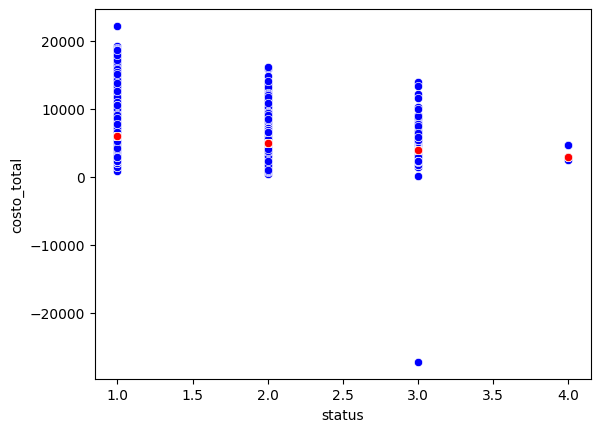

In [ ]:
#Visualizamos la gráfica comparativa

sns.scatterplot(x='status', y='costo_total', color="blue", data=df)
sns.scatterplot(x='status', y='Predicciones4', color="red", data=df)
#sns.lineplot(x='status', y='Predicciones4', color="red", data=df)

**QUINTA FUNCIÓN**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep5= df[['fraude']]
Var_Dep5= df['enganche']

In [ ]:
#Definir modelo de regresión lineal
model5= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['fraude'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([93.56856713]),
 'rank_': 1,
 'singular_': array([39.67031165]),
 'intercept_': 919.4367238756299}

Modelo matemático: y= -93.56856713x + 919.4367238756299

In [ ]:
#Predecimos fraude a partir de enganche
y_pred5= model5.predict(X=data[['fraude']])
y_pred5

array([919.43672388, 919.43672388, 919.43672388, ..., 919.43672388,
       919.43672388, 919.43672388])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones5', y_pred5)
Cuantitativas1

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,tag,fecha,marca,modelo,agente_venta,dis_venta,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,919.436724,4930.640590,1907.006743,3768.601003,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,Sintia Verenice Tenorio Perez E,mic0437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,919.436724,4930.640590,2981.058084,3768.615959,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,Alvaro Rafael Pascual,mic015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,919.436724,3897.833503,2570.830141,3768.635901,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,Sintia Verenice Tenorio Perez E,mic0437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,919.436724,4930.640590,2570.830141,3768.640887,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,Luz Aylin Hernandez Lopez1,mic0748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,919.436724,5963.447677,2630.499660,3768.670800,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,Sintia Verenice Tenorio Perez E,mic0437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,919.436724,5963.447677,2876.636426,4249.561109,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,Mildred Asuncion Arguello Caamal,svc044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,919.436724,5963.447677,2794.590837,4249.446442,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,Maria Guadalupe Vargas Lopez,PXC004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,919.436724,5963.447677,3212.277469,4249.261979,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,Nicolás Jiménez Sánchez,gph008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,919.436724,5963.447677,4181.907152,4249.730615,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,Maribel Ulibarri Medina,gph014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.0026671635569642804

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.19562736274586362

ValueError: ignored

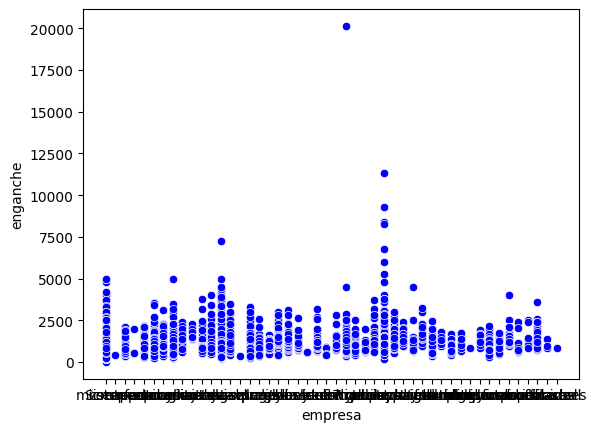

In [ ]:
#Visualizamos la gráfica comparativa

sns.scatterplot(x='empresa', y='enganche', color="blue", data=df)
sns.scatterplot(x='empresa', y='Predicciones5', color="red", data=df)
#sns.lineplot(x='empresa', y='Predicciones5', color="red", data=df)

**SEXTA FUNCIÓN**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  object 
 4   enganche          22735 non-null  object 
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  object 
 7   monto_financiado  22735 non-null  object 
 8   costo_total       22735 non-null  object 
 9   monto_accesorios  22735 non-null  object 
 10  status            22735 non-null  object 
 11  fraude            22735 non-null  object 
 12  inversion         22735 non-null  object 
 13  pagos_realizados  22735 non-null  object 
 14  reautorizacion    22735 non-null  object 
 15  puntos            22735 non-null  object 
 16  riesgo            22735 non-null  object

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep6= df[['precio']]
Var_Dep6= df['riesgo']

In [ ]:
#Definir modelo de regresión lineal
model6= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Var_Dep6)

ValueError: ignored

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object)}

Modelo matemático: y= -8.25277118e-05x + 0.03515555887652729

In [ ]:
#Predecimos el monto accesorios a partir de reautorización
y_pred6= model6.predict(X=data[['precio']])
y_pred6

AttributeError: ignored

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones6', y_pred4)
Cuantitativas1

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,tag,fecha,marca,modelo,agente_venta,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,4930.640590,919.436724,4930.640590,1907.006743,3768.601003,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,Sintia Verenice Tenorio Perez E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,4930.640590,919.436724,4930.640590,2981.058084,3768.615959,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,Alvaro Rafael Pascual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,3897.833503,919.436724,3897.833503,2570.830141,3768.635901,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,Sintia Verenice Tenorio Perez E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,4930.640590,919.436724,4930.640590,2570.830141,3768.640887,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,Luz Aylin Hernandez Lopez1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,5963.447677,919.436724,5963.447677,2630.499660,3768.670800,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,Sintia Verenice Tenorio Perez E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,5963.447677,919.436724,5963.447677,2876.636426,4249.561109,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,Mildred Asuncion Arguello Caamal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,5963.447677,919.436724,5963.447677,2794.590837,4249.446442,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,Maria Guadalupe Vargas Lopez,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,5963.447677,919.436724,5963.447677,3212.277469,4249.261979,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,Nicolás Jiménez Sánchez,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,5963.447677,919.436724,5963.447677,4181.907152,4249.730615,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,Maribel Ulibarri Medina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

AttributeError: ignored

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

In [ ]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='monto_accesorios', y='reautorizacion', color="blue", data=df)
sns.scatterplot(x='monto_accesorios', y='Predicciones6', color="red", data=df)
#sns.lineplot(x='monto_accesorios', y='Predicciones6', color="red", data=df)

**SEPTIMA FUNCIÓN**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  object 
 4   enganche          22735 non-null  object 
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  object 
 7   monto_financiado  22735 non-null  object 
 8   costo_total       22735 non-null  object 
 9   monto_accesorios  22735 non-null  object 
 10  status            22735 non-null  object 
 11  fraude            22735 non-null  object 
 12  inversion         22735 non-null  object 
 13  pagos_realizados  22735 non-null  object 
 14  reautorizacion    22735 non-null  object 
 15  puntos            22735 non-null  object 
 16  riesgo            22735 non-null  object

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep7= df[['precio']]
Var_Dep7= df['porc_enganche']

In [ ]:
#Definir modelo de regresión lineal
model7= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model7.fit(X=Vars_Indep7, y=Var_Dep7)

ValueError: ignored

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object)}

Modelo matemático: y= 0.76289563 + 26.814852204380713

In [ ]:
#Predecimos el precio a partir del monto financiado
y_pred7= model7.predict(X=data[['precio']])
y_pred7

AttributeError: ignored

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones7', y_pred7)
Cuantitativas1

NameError: ignored

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

AttributeError: ignored

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

NameError: ignored

ValueError: ignored

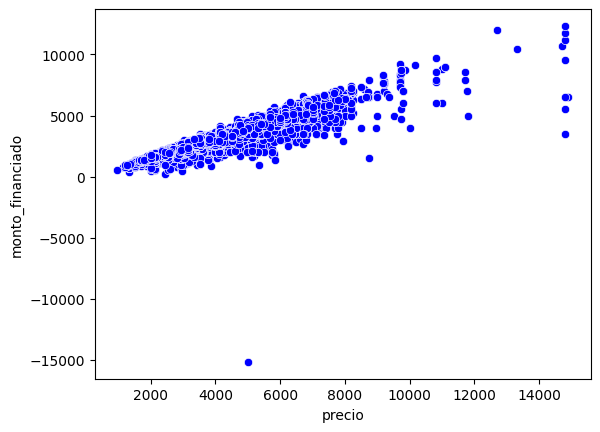

In [ ]:
#Visualizamos la gráfica comparativa

sns.scatterplot(x='precio', y='monto_financiado', color="blue", data=df)
sns.scatterplot(x='precio', y='Predicciones7', color="red", data=df)
#sns.lineplot(x='semana', y='Predicciones7', color="red", data=df)

**OCTAVA FUNCIÓN**

In [ ]:
#Verificar información de variables cuantitativas
Cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   plazo             22735 non-null  int64  
 3   precio            22735 non-null  object 
 4   enganche          22735 non-null  object 
 5   descuento         22735 non-null  float64
 6   semana            22735 non-null  object 
 7   monto_financiado  22735 non-null  object 
 8   costo_total       22735 non-null  object 
 9   monto_accesorios  22735 non-null  object 
 10  status            22735 non-null  object 
 11  fraude            22735 non-null  object 
 12  inversion         22735 non-null  object 
 13  pagos_realizados  22735 non-null  object 
 14  reautorizacion    22735 non-null  object 
 15  puntos            22735 non-null  object 
 16  riesgo            22735 non-null  object

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep8= df[['status']]
Var_Dep8= df['pagos_realizados']

In [ ]:
#Definir modelo de regresión lineal
model8= LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model8.fit(X=Vars_Indep8, y=Var_Dep8)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['status'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.40639355]),
 'rank_': 1,
 'singular_': array([68.14161827]),
 'intercept_': 3.3937154855927893}

In [ ]:
#Predecimos el status a partir de los pagos realizados
y_pred8= model8.predict(X=data[['status']])
y_pred8

array([14.20650259, 14.20650259, 19.61289615, ...,  8.80010904,
        8.80010904,  8.80010904])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
Cuantitativas1.insert(0, 'Predicciones8', y_pred8)
Cuantitativas1

,Predicciones8,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,tag,fecha,marca,modelo,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,porc_enganche,porc_tasa,score_buro,Unnamed: 35,Unnamed: 36
0,14.206503,4930.640590,919.436724,4930.640590,1907.006743,3768.601003,HDNAWQ3A,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
1,14.206503,4930.640590,919.436724,4930.640590,2981.058084,3768.615959,M418YNR4,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
2,19.612896,3897.833503,919.436724,3897.833503,2570.830141,3768.635901,SZ7V3NZT,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
3,14.206503,4930.640590,919.436724,4930.640590,2570.830141,3768.640887,9I08UIQZ,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
4,8.800109,5963.447677,919.436724,5963.447677,2630.499660,3768.670800,JMF4LKYU,13/11/2021 16:10,MOTOROLA,G10 B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,8.800109,5963.447677,919.436724,5963.447677,2876.636426,4249.561109,92KQVRIX,18/04/2023 18:45,Motorola,Moto E13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22731,8.800109,5963.447677,919.436724,5963.447677,2794.590837,4249.446442,NWB2EA8J,18/04/2023 18:46,Motorola,Moto E22i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22732,8.800109,5963.447677,919.436724,5963.447677,3212.277469,4249.261979,VDTRJ2W6,18/04/2023 18:47,Samsung,A13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0
22733,8.800109,5963.447677,919.436724,5963.447677,4181.907152,4249.730615,PETLF56C,18/04/2023 18:49,Samsung,A53 5G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93080.0


In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model3.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

ValueError: ignored

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

NameError: ignored

ValueError: ignored

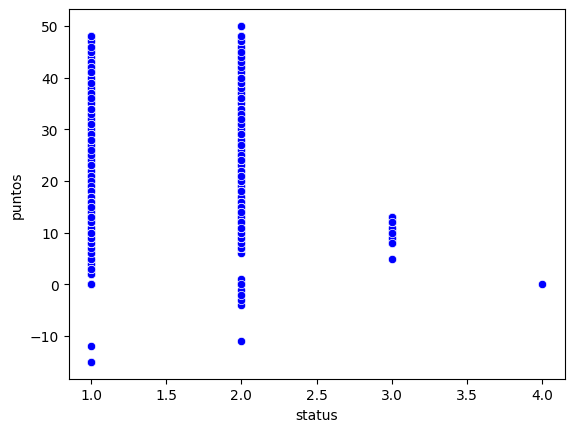

In [ ]:
#Visualizamos la gráfica comparativa

sns.scatterplot(x='status', y='puntos', color="blue", data=df)
sns.scatterplot(x='status', y='Predicciones8', color="red", data=df)
#sns.lineplot(x='semana', y='Predicciones8', color="red", data=df)

In [ ]:
#Convertir DataFrame a CSV
Cuantitativas1.to_csv("Dataframe_procesado.csv")

In [ ]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Dataframe_procesado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>